# 最低有效位盲水印

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [4]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
mask_img = cv2.imread('../datas/f1.jpg')
mask_img = cv2.cvtColor(mask_img,cv2.COLOR_BGR2RGB)

In [5]:
channel_r = rgb[:,:,0]
channel_g = rgb[:,:,1]
channel_b = rgb[:,:,2]

In [24]:
th,wm_img = cv2.threshold(mask_img,127,1,cv2.THRESH_BINARY)
temp = np.ones(mask_img.shape,dtype=rgb.dtype)
temp.fill(254)
t = np.ones(mask_img.shape,dtype=rgb.dtype)

In [19]:
# 第一个通道与temp按位与运算，只保留第一个通道的高7位，最低位为0
emsrc = cv2.bitwise_and(rgb,temp)
# 将水印嵌入图像的最低位
emsrc = cv2.bitwise_or(emsrc,wm_img)

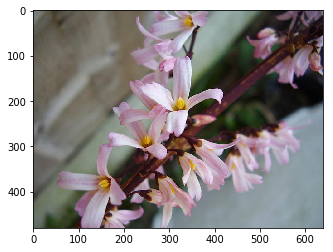

In [21]:
plt.imshow(emsrc,'gray')

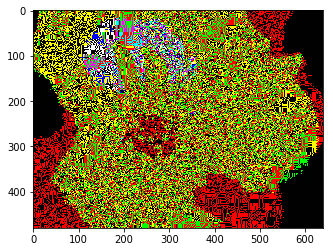

In [22]:
dst = rgb - emsrc
dst[dst < 0] = 0
plt.imshow(dst)

In [28]:
# 提取
extractsrc = cv2.bitwise_and(emsrc,t)
extractsrc = cv2.bitwise_and(extractsrc,emsrc)
extractsrc = 255 * extractsrc

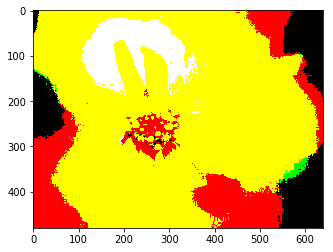

In [29]:
plt.imshow(extractsrc)

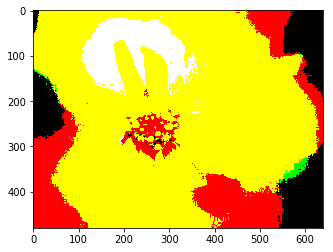

In [31]:
plt.imshow(wm_img)